# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
periods = range(2, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,7.01,5.86,8.29,6.98,4.54,9.29,10.38,7.85,4.33,2.16,2.42,2.09,0.95,2.20
max_closed_out_drawdown,-30.62,-42.61,-24.94,-24.76,-28.23,-19.82,-33.01,-48.53,-50.44,-49.66,-50.17,-46.48,-60.50,-58.98
drawdown_annualized_return,-4.37,-7.27,-3.01,-3.55,-6.22,-2.13,-3.18,-6.18,-11.66,-23.03,-20.70,-22.27,-63.95,-26.79
drawdown_recovery,-0.50,-3.18,-0.57,-0.90,-1.28,-3.44,-3.77,-3.85,-3.54,-3.52,-3.52,-3.52,-3.52,-3.52
best_month,26.90,30.31,29.96,26.94,26.95,22.74,22.73,22.73,22.73,24.40,22.73,21.90,21.89,21.93
worst_month,-16.77,-21.29,-17.70,-17.70,-17.70,-17.70,-17.70,-24.38,-24.36,-24.32,-24.33,-24.37,-24.34,-24.37
sharpe_ratio,0.49,0.40,0.52,0.46,0.34,0.60,0.65,0.51,0.32,0.21,0.22,0.20,0.14,0.21
sortino_ratio,0.36,0.32,0.42,0.35,0.25,0.45,0.49,0.38,0.25,0.16,0.17,0.16,0.12,0.17
monthly_std,4.81,5.45,4.86,4.55,4.10,3.95,4.17,4.28,4.47,4.39,4.28,4.17,4.42,4.49
pct_time_in_market,28.05,28.81,28.47,26.60,24.36,24.30,23.69,24.49,26.48,25.81,25.84,25.07,27.46,27.62


Bar graphs

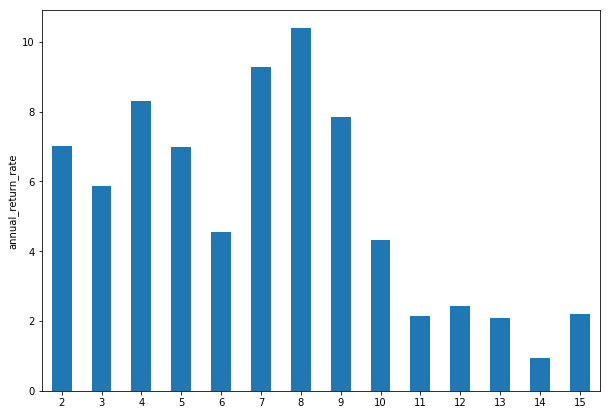

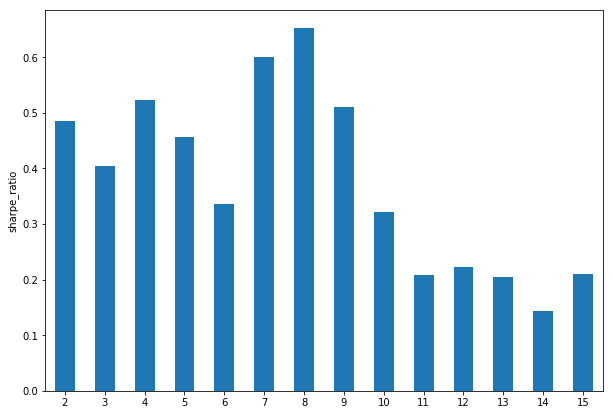

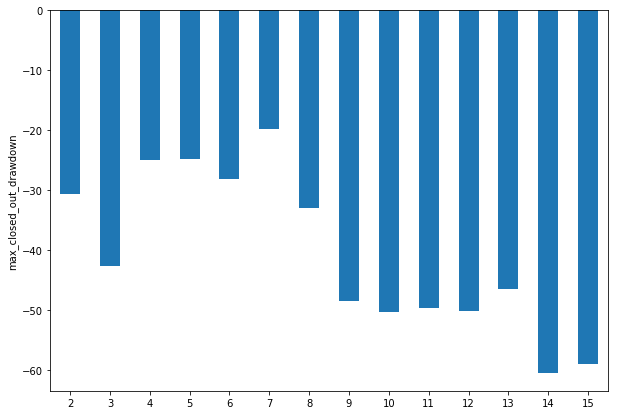

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2007-03-08 00:00:00 BUY  260 GDX @ 38.35
2020-02-14 00:00:00 SELL 260 GDX @ 28.31


Equity curve

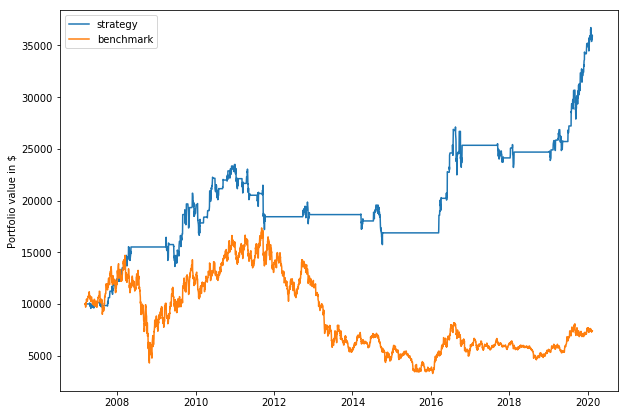

In [9]:
pf.plot_equity_curve(strategies['8'].dbal, benchmark=benchmark.dbal)